In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import math
import matplotlib as mpl
import random
import scipy.stats as st

from sklearn.neighbors import KernelDensity
from distfit import distfit
from statistics import mean

In [5]:
np.random.seed(2021)

'''1. major model parameters set up'''

n = 5000; #the modeling size
run = 0; # initialize the count of simulations
runtime = 100 # How many simulation, here just using 1 to reflect both the supracrustal and overturned signatures
R = []; # an array used for store temporary data
X1 = []; # an array used for store dtdz90 data of all runs in one column
Y1 = []; # an array used for store temporary of all runs in one column

X = []; 
Y = [];

prob = 0.05 # the sampling probability for each increment of the PCO surface
p0 =4100;
p1 =3800;
p2 =3600;
p3 =3400;
p4 =3200;
p5 =3000;
p6 =2800;
p7 =2600;
p8 =2500; 
p =[4100,3800,3600,3400,3200,3000,2800,2600,2500];
# prescribed times for generating simulated detrital zirocn age records

'''2. Initial numbers setup'''
N01 = np.zeros([1,100]); N11 = np.zeros([1,100]); N21 = np.zeros([1,100]); N31 = np.zeros([1,100]); N41 = np.zeros([1,100]); N51 = np.zeros([1,100]); N61 = np.zeros([1,100]); N71 = np.zeros([1,100]); N81 = np.zeros([1,100]);
# arrays used for storing all sorted dtdz90 data of the time of deposition - for easy monitoring of data

N01 = np.pad(N01,((1000,0),(0,0)),'constant',constant_values=[9999]); N11 = np.pad(N11,((1000,0),(0,0)),'constant',constant_values=[9999]); N21 = np.pad(N21,((1000,0),(0,0)),'constant',constant_values=[9999]); N31 = np.pad(N31,((1000,0),(0,0)),'constant',constant_values=[9999]); N41 = np.pad(N41,((1000,0),(0,0)),'constant',constant_values=[9999]);
N51 = np.pad(N51,((1000,0),(0,0)),'constant',constant_values=[9999]); N61 = np.pad(N41,((1000,0),(0,0)),'constant',constant_values=[9999]); N71 = np.pad(N41,((1000,0),(0,0)),'constant',constant_values=[9999]); N81 = np.pad(N41,((1000,0),(0,0)),'constant',constant_values=[9999]); 
N_1=[N01,N11,N21,N31,N41,N51,N61,N71,N81];
# Use 9999 as the default value to keep the sorted results being stored in front rows

N02 = []; N12 = [];N22 = []; N32 = []; N42 = []; N52 = []; N62 = []; N72 = []; N82 = []; # arrays storing sorted ?tdz90 data(used for calculation of cumulative probabilities)
N03 = [];N13 = []; N23 = []; N33 = []; N43 = []; N53 = []; N63 = []; N73 = []; N83 = []; # arrays storing sorted crystallization age data (used for calculation of probability densitiy)
N04 = [];N14 = []; N24 = []; N34 = []; N44 = []; N54 = []; N64 = []; N74 = []; N84 = []; # arrays storing data from all runs, used as the 'best-fit' simulation results
N_2 = [N02,N12,N22,N32,N42,N52,N62,N72,N82];
N_3 = [N03,N13,N23,N33,N43,N53,N63,N73,N83];
N_4 = [N04,N14,N24,N34,N44,N54,N64,N74,N84];
color_DZ = [N02,N12,N22,N32,N42,N52,N62,N72,N82]

prob = 0.05 # sampling probability for the surface (considering resurfaced and overturned surface have the same probability to be sampled)

'''3. Calculation lines'''

while run < runtime:

    run = run+1;
    N = np.zeros([1,n]); # setup initial surface
    j = 4500; # setup initial time i.e. 4.5 Ga
    
    magma_position = 0
    last_magma_resurf_start = []
    last_magma_resurf_start.append(4500) # setup initial major (magma)resurface time at 4.5 Ga, also the age of new intrusions such as TTG
    magmalast = 0; # initialize the time passed since the last periodic magma resurfacing event
    magmanext = abs(round(np.random.normal(30,5)))
    magma_nextround = abs(round(np.random.normal(70,10)))
    #last_magma_resurf_start.append(last_magma_resurf_start[-1] - magma_nextround)
    
    overturn_position = 0
    overturnlast = 0; # initialize the time passed since the last periodic magma resurfacing event
    overturnnext = abs(round(np.random.normal(40,10))) # the period of the PCO cycle
    last_overturn_start = []
    last_overturn_start.append(4500) 
    overturn_nextround = abs(round(np.random.normal(100,15))); # The time gap between PCO cycles
    #last_overturn_start.append(last_overturn_start[-1]-overturn_nextround)
    
    while j >= 2500:
        
        # Magma ratio setup
        magmalast = magmalast+1; # calculate the time passed since last resurfacing
        magma_position = magmalast-magma_nextround
        #magma_ratio = 0.75
        magma_ratio_master = 2 #important: control the coverage of magma resurfacing!
        magma_ratio = np.linspace(0,2*magma_ratio_master/magmanext,magmanext/2)
        
        if magma_position >= 0 and magma_position < magmanext/2:
            rsfcA_upp = random.uniform(0, 1)*(n*(1-magma_ratio[magma_position-1])) + n * magma_ratio[magma_position-1]
            rsfcA_low = rsfcA_upp - n*magma_ratio[magma_position-1]  # calculate the current resurfacing precentage, assuming the magma resurfacing ratio has been constant around 75 % of area
            
        if magma_position >= 0 and magma_position >= magmanext/2:
            rsfcA_upp = random.uniform(0, 1)*(n*(1-magma_ratio[magmanext - magma_position -1])) + n * magma_ratio[magmanext - (magma_position)-1]
            rsfcA_low = rsfcA_upp - n*magma_ratio[magmanext - (magma_position)-1] # calculate the current resurfacing precentage, assuming the magma resurfacing ratio has been constant around 75 % of area
        
        # Overturn ratio setup
        overturnlast = overturnlast+1; 
        overturn_position = overturnlast-overturn_nextround # initialize the time passed since the last periodic magma resurfacing event
        
        #overturn_ratio = 0.8
        overturn_ratio_master = 0.8 #important: controls the coverage of overturn!
        
        if overturnlast == overturn_nextround:
            rsfcB_upp = random.uniform(0, 1)*(n*(1-overturn_ratio_master)) + n * overturn_ratio_master
            rsfcB_low = rsfcB_upp - (n * overturn_ratio_master) # calculate the current overturn exposed precentage, assuming the partial convective overturn resurfacing has been constant around 40 % of area
        
        if overturn_position >= 0 and overturn_position < 0.6 * overturnnext: # assuming the first 60% is increasing old rocks, the last 20% is the young TTG
            returned_age = (last_magma_resurf_start[-1]-j) + (overturn_position/(overturnnext*0.6)) * np.random.normal(mean(last_magma_resurf_start[-16:])-j,30) # important: control the age distribution of the overturned old materials!
            
        if overturn_position >= 0 and overturn_position >= 0.6 * overturnnext: # assuming the first 60% is increasing old rocks, the last 20% is the young TTG
            returned_age = np.random.uniform(0,last_overturn_start[-1]-j)
        
        '''changes start here -- continuous magma resurfacing'''
        if magmalast >= magma_nextround: 
            
            if magma_position < magmanext:
                for i in range(n): 
                    N[0,i] = N[0,i]+1 # make each surface increment 1 Ma older
                    if i <= rsfcA_upp and i >= rsfcA_low: # check if this increment should be resurfaced
                        N[0,i] = 0 # this assumes the global resufacing happens and ends immediately 
        
            else: # if a magma resurfing cycle is ended 
                for i in range(n): 
                    N[0,i] = N[0,i]+1 # make each surface increment 1 Ma older
                
                last_magma_resurf_start.append(j+magmanext)
                magmalast = 0;
                magma_position = 0;
                magmanext = abs(round(np.random.normal(30,5)));
                magma_nextround = abs(round(np.random.normal(70,10)))
                 

        else: # if a magma resurfing cycle is ended 
            for i in range(n): 
                N[0,i] = N[0,i]+1 # make each surface increment 1 Ma older
    
        '''changes start here -- continuous partial overturn''' 
        if overturnlast >= overturn_nextround:
            
            if overturn_position < overturnnext: # if an mantle overturn event is triggered
                for i in range(n): 
                    #N[0,i] = N[0,i]+1  # make each surface increment 1 Ma older
                    if i <= rsfcB_upp and i >= rsfcB_low: # check if this increment should be overturned
                        N[0,i] = returned_age

            else:
                #for i in range(n): 
                    #N[0,i] = N[0,i]+1 
                last_overturn_start.append(j+overturnnext)
                overturnlast = 0;
                overturn_position = 0;
                overturnnext = abs(round(np.random.normal(40,10)))
                overturn_nextround = abs(round(np.random.normal(110,15)))
                
                #color_DZ_at_j = 'blue' # blue color reflect actual PCO
                
        
        j = j-1 # move time forward
        
        if j == p[0]: # generate a detrial zircon record at p0 time
            for k in range(n):
                if random.uniform(0, 1) <= prob:
                    R.append(N[0,k])
                    N_4[0].append(N[0,k])
                    
            N_1[0][0:len(R),run-1] = np.array(sorted(R))
            N_2[0].append(np.array(sorted(R)))
            N_3[0].append(N_2[0][run-1]+j) 
            #color_DZ[0] = color_DZ_at_j
            
            X.append(N_1[0][round(0.9*len(R)),run-1]) # Calculate the DZ90 age of the run at p0 age
            Y.append(j)
            R = []
            
        if j == p[1]: # generate a detrial zircon record at p0 time
            for k in range(n):
                if random.uniform(0, 1) <= prob:
                    R.append(N[0,k])
                    N_4[1].append(N[0,k])
                    
            N_1[1][0:len(R),run-1] = np.array(sorted(R))
            N_2[1].append(np.array(sorted(R)))
            N_3[1].append(N_2[1][run-1]+j) 
            #color_DZ[1] = color_DZ_at_j
            
            X.append(N_1[1][round(0.9*len(R)),run-1])
            Y.append(j)
            R = []
            
        if j == p[2]: # generate a detrial zircon record at p0 time
            for k in range(n):
                if random.uniform(0, 1) <= prob:
                    R.append(N[0,k])
                    N_4[2].append(N[0,k])
                    
            N_1[2][0:len(R),run-1] = np.array(sorted(R))
            N_2[2].append(np.array(sorted(R)))
            N_3[2].append(N_2[2][run-1]+j) 
            #color_DZ[2] = color_DZ_at_j
            
            X.append(N_1[2][round(0.9*len(R)),run-1])
            Y.append(j)
            R = []
            
        if j == p[3]: # generate a detrial zircon record at p0 time
            for k in range(n):
                if random.uniform(0, 1) <= prob:
                    R.append(N[0,k])
                    N_4[3].append(N[0,k])
                    
            N_1[3][0:len(R),run-1] = np.array(sorted(R))
            N_2[3].append(np.array(sorted(R)))
            N_3[3].append(N_2[3][run-1]+j) 
            #color_DZ[3] = color_DZ_at_j
            
            X.append(N_1[3][round(0.9*len(R)),run-1])
            Y.append(j)
            R = []
            
        if j == p[4]: # generate a detrial zircon record at p0 time
            for k in range(n):
                if random.uniform(0, 1) <= prob:
                    R.append(N[0,k])
                    N_4[4].append(N[0,k])
                    
            N_1[4][0:len(R),run-1] = np.array(sorted(R))
            N_2[4].append(np.array(sorted(R)))
            N_3[4].append(N_2[4][run-1]+j) 
            #color_DZ[4] = color_DZ_at_j
            
            X.append(N_1[4][round(0.9*len(R)),run-1])
            Y.append(j)
            R = []
            
        if j == p[5]: # generate a detrial zircon record at p0 time
            for k in range(n):
                if random.uniform(0, 1) <= prob:
                    R.append(N[0,k])
                    N_4[5].append(N[0,k])
                    
            N_1[5][0:len(R),run-1] = np.array(sorted(R))
            N_2[5].append(np.array(sorted(R)))
            N_3[5].append(N_2[5][run-1]+j) 
            #color_DZ[5] = color_DZ_at_j
            
            X.append(N_1[5][round(0.9*len(R)),run-1])
            Y.append(j)
            R = []
            
        if j == p[6]: # generate a detrial zircon record at p0 time
            for k in range(n):
                if random.uniform(0, 1) <= prob:
                    R.append(N[0,k])
                    N_4[6].append(N[0,k])
                    
            N_1[6][0:len(R),run-1] = np.array(sorted(R))
            N_2[6].append(np.array(sorted(R)))
            N_3[6].append(N_2[6][run-1]+j) 
            #color_DZ[6] = color_DZ_at_j
            
            X.append(N_1[6][round(0.9*len(R)),run-1])
            Y.append(j)
            R = []
            
        if j == p[7]: # generate a detrial zircon record at p0 time
            for k in range(n):
                if random.uniform(0, 1) <= prob:
                    R.append(N[0,k])
                    N_4[7].append(N[0,k])
                    
            N_1[7][0:len(R),run-1] = np.array(sorted(R))
            N_2[7].append(np.array(sorted(R)))
            N_3[7].append(N_2[7][run-1]+j) 
            #color_DZ[7] = color_DZ_at_j
            
            X.append(N_1[7][round(0.9*len(R)),run-1])
            Y.append(j)
            R = []
            
        if j == p[8]: # generate a detrial zircon record at p0 time
            for k in range(n):
                if random.uniform(0, 1) <= prob:
                    R.append(N[0,k])
                    N_4[8].append(N[0,k])
                    
            N_1[8][0:len(R),run-1] = np.array(sorted(R))
            N_2[8].append(np.array(sorted(R)))
            N_3[8].append(N_2[8][run-1]+j) 
            #color_DZ[8] = color_DZ_at_j
            
            X.append(N_1[8][round(0.9*len(R)),run-1])
            Y.append(j)
            R = []
            

In [6]:
magma_ratio = np.random.triangular(0,magma_ratio_master/2,magma_ratio_master,magmanext)
magmanext

38

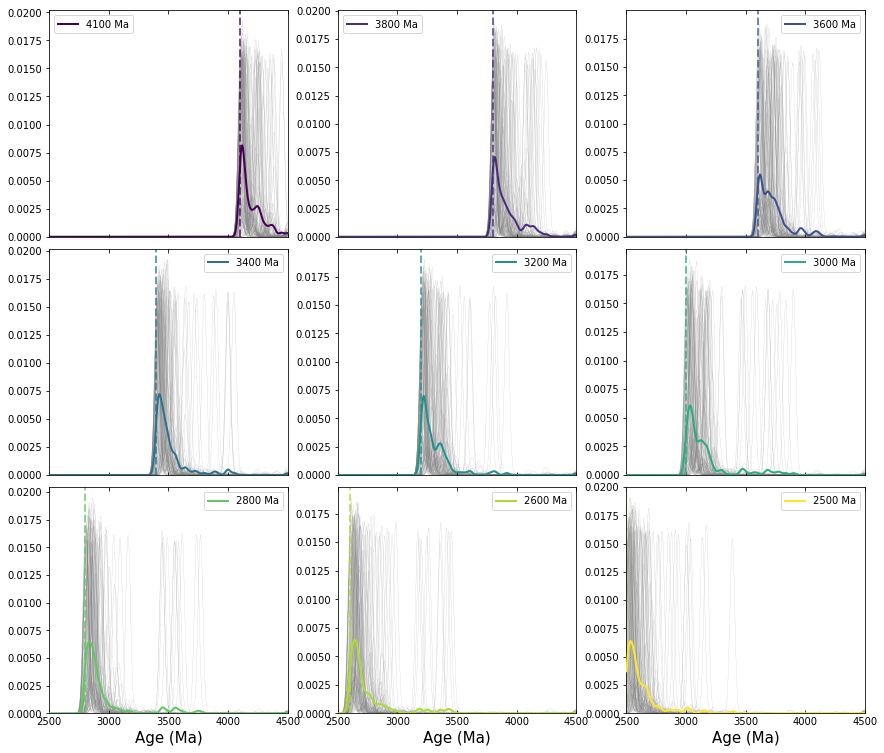

In [7]:
# Fig.1 PDF for individual depositional age and delta_Tdz

fig, axs = plt.subplots(nrows=3,ncols=3,sharex = True, sharey = False, figsize=(12,10))

# color scheme
cmap = plt.get_cmap("viridis",len(p))

for i in range(len(p)):

    # Plot for each individual run
    for k in range(runtime):
        x = np.arange(2500, 4501)
        # Make Kernel fit
        model = KernelDensity(bandwidth=20)
        model.fit(N_3[i][k][:, None])
        log_dens = model.score_samples(x[:, None])
        # Plot
        axs[i//3,i%3].plot(x,np.exp(log_dens),color = 'C7',linewidth=0.2,alpha=0.5,zorder=1)
    
    # Plot for the average of all runs
    age = np.array(N_4[i])+ p[i]
    x = np.arange(2500, 4501)
    model = KernelDensity(bandwidth=20)
    model.fit(np.array(age)[:,None])
    log_dens = model.score_samples(x[:, None])
    axs[i//3,i%3].plot(x,np.exp(log_dens),color = cmap(i),zorder=10,linewidth=2,label=(str(p[i])+' '+'Ma'))
    axs[i//3,i%3].legend()

    # Plot the sedimentation age
    axs[i//3,i%3].axvline(p[i], c = cmap (i), ls='--',linewidth=2,alpha=0.7)
    
    # Axis adjustments
    axs[i//3,i%3].tick_params(axis='x',which='both',top=True,labeltop=False,direction='in')
    axs[i//3,i%3].set_ylim(bottom=0)
    axs[i//3,i%3].set_xlim(2500,4500)
    
plt.tight_layout(pad=0, w_pad=0.2, h_pad=0.2)
axs[2,0].set_xlabel('Age (Ma)',size=15)
axs[2,1].set_xlabel('Age (Ma)',size=15)
axs[2,2].set_xlabel('Age (Ma)',size=15)

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/V1.7 continuous/pdf_PCO_indovidual.pdf', bbox_inches='tight')

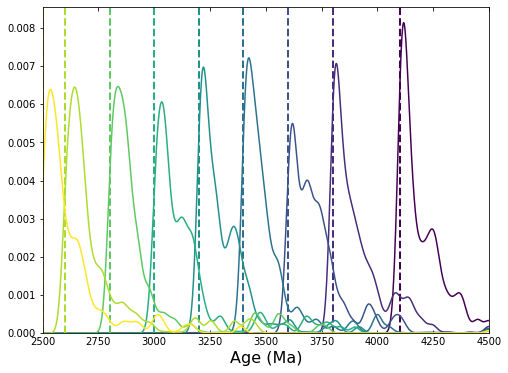

In [8]:
# Fig.2 PDF for individual depositional age and delta_Tdz [combined]
fig, axs = plt.subplots(nrows=1,ncols=1,sharex = True, sharey = False, figsize=(8,6))

for i in range(len(p)):
    age = np.array(N_4[i])+ p[i]
    x = np.arange(2500, 4501)
    model = KernelDensity(bandwidth=20)
    model.fit(np.array(age)[:,None])
    log_dens = model.score_samples(x[:, None])
    axs.plot(x,np.exp(log_dens),color = cmap (i))

    # Plot the sedimentation age
    axs.axvline(p[i], c = cmap (i), ls='--',linewidth=2,alpha=1)

axs.tick_params(axis='x',which='both',top=True,labeltop=False,direction='in')
axs.set_ylim(bottom=0)
axs.set_xlim(2500,4500)
axs.set_xlabel('Age (Ma)',fontsize=16)

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/V1.7 continuous/pdf_PCO_combined.pdf', bbox_inches='tight')
plt.show()

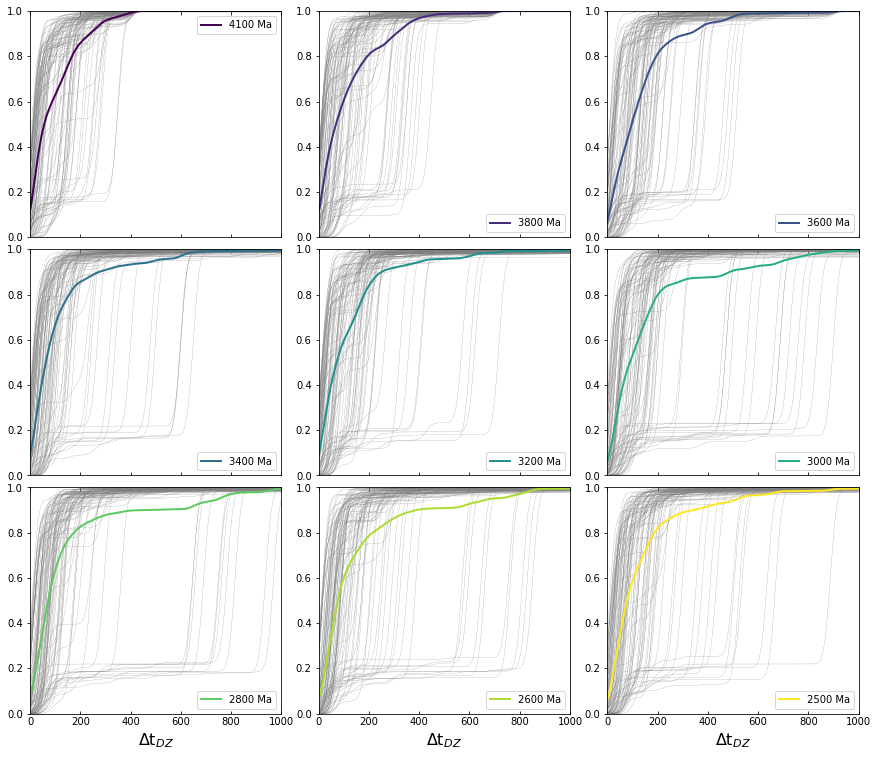

In [9]:
# Fig.3 CDF for individual depositional age and delta_Tdz

fig, axs = plt.subplots(nrows=3,ncols=3,sharex = True, sharey = False, figsize=(12,10))

for i in range(len(p)):

    # Plot for each individual run
    for k in range(runtime):
        x = np.arange(-1000, 1001)
        # Make Kernel fit
        model = KernelDensity(bandwidth=20)
        model.fit(N_2[i][k][:, None])
        log_dens = model.score_samples(x[:, None])
        # Convert pdf to cdf
        cdf = np.cumsum(np.exp(log_dens))
        # Plot
        axs[i//3,i%3].plot(x,cdf,'C7',linewidth=0.2)
        axs[i//3,i%3].set_ylim(0,1)
        axs[i//3,i%3].set_xlim(0,1000)
        
    
    # Plot for the average of all runs
    age = np.array(N_4[i])
    x = np.arange(-1000, 1001)
    model = KernelDensity(bandwidth=20)
    model.fit(np.array(age)[:,None])
    log_dens = model.score_samples(x[:, None])
    cdf = np.cumsum(np.exp(log_dens))
    axs[i//3,i%3].plot(x,cdf,color = cmap (i),linewidth=2,label=(str(p[i])+' '+'Ma'))
    
    # Axis adjustments
    axs[i//3,i%3].tick_params(axis='x',which='both',top=True,labeltop=False,direction='in')
    axs[i//3,i%3].set_ylim(bottom=0)
    axs[i//3,i%3].legend()
    
plt.tight_layout(pad=0, w_pad=0.2, h_pad=0.2)
axs[2,0].set_xlabel('$\\Delta$' + "t" + '$_{DZ}$',size=16)
axs[2,1].set_xlabel('$\\Delta$' + "t" + '$_{DZ}$',size=16)
axs[2,2].set_xlabel('$\\Delta$' + "t" + '$_{DZ}$',size=16)

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/V1.7 continuous/cdf_PCO.pdf', bbox_inches='tight')
plt.show()
    # Plot the sedimentation age
    #axs[i//3,i%3].axvline(p[i], c='seagreen', ls='-',linewidth=2,alpha=0.7)

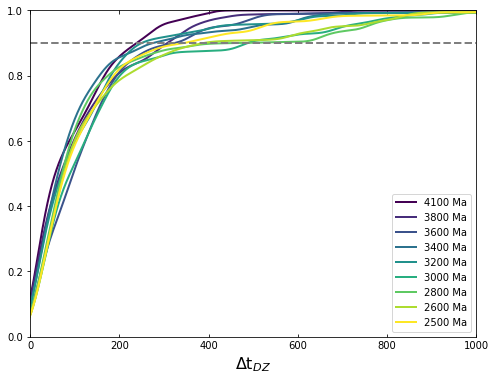

In [10]:
# Fig.3 CDF for individual depositional age and delta_Tdz [combined]

fig, axs = plt.subplots(nrows=1,ncols=1,sharex = True, sharey = False, figsize=(8,6))

for i in range(len(p)):
    age = np.array(N_4[i])
    x = np.arange(-1000, 1001)
    model = KernelDensity(bandwidth=20)
    model.fit(np.array(age)[:,None])
    log_dens = model.score_samples(x[:, None])
    cdf = np.cumsum(np.exp(log_dens))
    axs.plot(x,cdf,color = cmap (i),linewidth=2, label= (str(p[i])+' '+'Ma'))

axs.axhline(0.9, c = 'C7', ls='--',linewidth=2,alpha=1)
axs.tick_params(axis='x',which='both',top=True,labeltop=False,direction='in')
axs.set_ylim(bottom=0,top=1)
axs.set_xlim(0,1000)
axs.set_xlabel('$\\Delta$' + "t" + '$_{DZ}$',size=16)
axs.legend()

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/V1.7 continuous/cdf_PCO_combined.pdf', bbox_inches='tight')
plt.show()

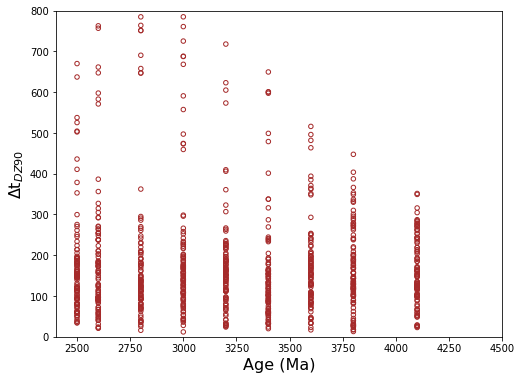

In [11]:
fig, axs = plt.subplots(nrows=1,ncols=1,sharex = True, sharey = False, figsize=(8,6))

axs.scatter(Y,X,s=20,facecolors="None",linewidth=1, color = 'brown');
axs.set_xlim(2400,4500)
axs.set_ylim(0,800)
axs.set_xlabel('Age (Ma)',size=16)
axs.set_ylabel('$\\Delta$' + "t" + '$_{DZ90}$',size=16)

ax = fig.gca()
# Contourf plot

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/V1.7 continuous/DZ90_PCO_evolution.pdf', bbox_inches='tight')

XY=[];
XY.append(Y)
XY.append(X)

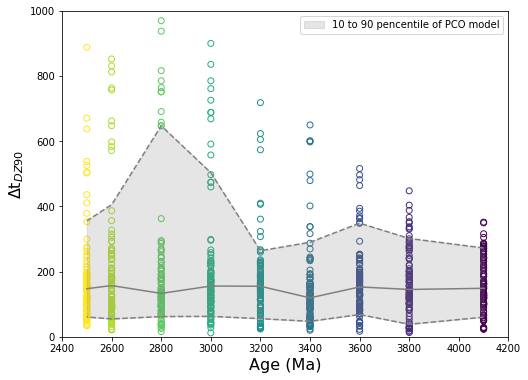

In [18]:
fig, axs = plt.subplots(nrows=1,ncols=1,sharex = True, sharey = False, figsize=(8,6))

# Transpose data into PandaFrame
df = pd.DataFrame(XY).T
df.columns = ['Age', 'Dt90']
df_sorted = df.sort_values(by=['Age'])

data_10_percent = []
data_90_percent = []
data_50_percent = []

color_default=0

for i in p:
    data = df_sorted.loc[df['Age'] == i]
    data_10_percent.append(data.quantile(0.1)[1])
    data_50_percent.append(data.quantile(0.5)[1])
    data_90_percent.append(data.quantile(0.9)[1])
    plt.scatter(np.repeat(i, len(data)),np.array(data)[:,1],facecolors="None",linewidth=1, color = cmap (color_default))
    color_default = color_default+1
    
plt.plot(p,data_10_percent,linewidth=1.5,c='C7',ls='--')
plt.plot(p,data_50_percent,linewidth=1.5,c='C7')
plt.plot(p,data_90_percent,'C7',linewidth=1.5,c='C7',ls='--')
plt.fill_between(p, data_10_percent, data_90_percent, color='C7',alpha=0.2,label = '10 to 90 pencentile of PCO model',zorder=2)

axs.set_xlim(2400,4200)
axs.set_ylim(0,1000)
axs.set_xlabel('Age (Ma)',size=16)
axs.set_ylabel('$\\Delta$' + "t" + '$_{DZ90}$',size=16)
axs.legend(loc='upper right')

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/V1.7 continuous/DZ90_PCO_evolution_90 perc.pdf', bbox_inches='tight')

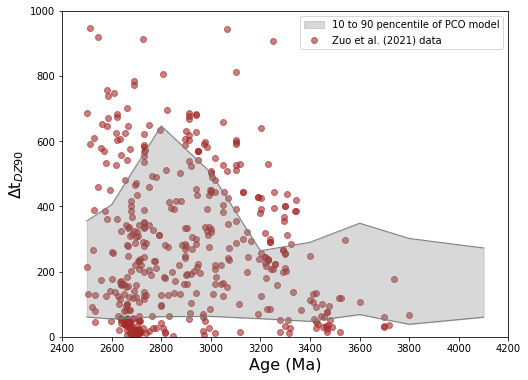

In [19]:
fig, axs = plt.subplots(nrows=1,ncols=1,sharex = True, sharey = False, figsize=(8,6))

# Read in Zuo's data
zuo_data = pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/data files/DZ90_Zuo.csv',header=0)


plt.plot(p,data_10_percent,linewidth=1,c='C7')
plt.plot(p,data_90_percent,'C7',linewidth=1,c='C7')
plt.fill_between(p, data_10_percent, data_90_percent, color='C7',alpha=0.3,label = '10 to 90 pencentile of PCO model',zorder=2)
plt.scatter(zuo_data['deposition_age'],zuo_data['DZ90'],label="Zuo et al. (2021) data",facecolors="brown",color = 'brown',alpha=0.6)

axs.set_xlim(2400,4200)
axs.set_ylim(0,1000)
axs.set_xlabel('Age (Ma)',size=16)
axs.set_ylabel('$\\Delta$' + "t" + '$_{DZ90}$',size=16)
axs.legend()

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/V1.7 continuous/DZ90_PCO_evolution_90 perc_zuo data.pdf', bbox_inches='tight')

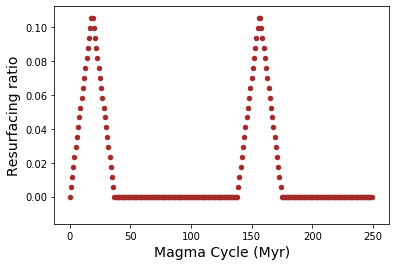

In [160]:
# Illustrating continuous magma cycle

for i in range(250):
    
    if i < magmanext:
        magma_cycle = i
        magma_resurface_ratio = np.concatenate((magma_ratio,magma_ratio[::-1]))[i]
        plt.scatter(i,magma_resurface_ratio,c='brown',s=20)
        
    elif i >= 100+magmanext and i < 100+2*magmanext: 
        magma_cycle = i
        magma_resurface_ratio = np.concatenate((magma_ratio,magma_ratio[::-1]))[i-100-magmanext]
        plt.scatter(i,magma_resurface_ratio,c='brown',s=20)
        
    else:
        magma_cycle = i
        magma_resurface_ratio = 0
        plt.scatter(i,magma_resurface_ratio,c='brown',s=20)
        
#plt.plot(magma_cycle,magma_resurface_ratio,linewidth=5)
plt.xlabel('Magma Cycle (Myr)',fontsize=14)
plt.ylabel('Resurfacing ratio' ,fontsize=14)

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/V1.7 continuous/magma_cycle.pdf', bbox_inches='tight')


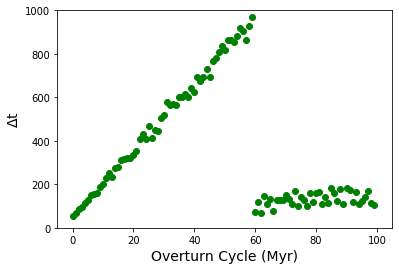

In [170]:


for i in range(100):

    if i < 60: # assuming the first 80% is increasing old rocks, the last 20% is the young TTG
        returned_age = (last_magma_resurf_start[-1]-j) + (i/60) * np.random.normal(mean(last_magma_resurf_start[-16:])-j,55) + i # important: control the age distribution of the overturned old materials!
            
    if i >= 60: # assuming the first 80% is increasing old rocks, the last 20% is the young TTG
        returned_age = np.random.uniform(0,last_overturn_start[-1]-j) + i
        
    plt.scatter(i,returned_age,c='green')
    
plt.xlabel('Overturn Cycle (Myr)',fontsize=14)
plt.ylabel('$\\Delta$' + "t",fontsize=14)
plt.ylim(0,1000)

plt.savefig('/Users/hairuo/Dropbox/Hairuo_projects/Course projects/EPS275/V1.7 continuous/overturn_age.pdf', bbox_inches='tight')
